In [8]:
import os
import glob
from tqdm import tqdm
import shutil

In [2]:
all_dataset = [
    '/tmp/text_renderer/final_randomize_400k_2/',
    '/tmp/text_renderer/final_randomize_400k_2_missing_1//'
]

In [3]:
new_dataset_path = './final_combined_randomize_400k_2/'
os.makedirs(new_dataset_path, exist_ok=True)
new_image_path = os.path.join(new_dataset_path, 'images')
os.makedirs(new_image_path, exist_ok=True)

In [9]:
new_tgt = []
new_src = []
for index, curr_dataset_path in enumerate(all_dataset):
    src_path = os.path.join(curr_dataset_path, 'src.txt')
    tgt_path = os.path.join(curr_dataset_path, 'tgt.txt')
    curr_src = open(src_path, 'r').read().split('\n')[:-1]
    curr_tgt = open(tgt_path, 'r').read().split('\n')[:-1]
    
    for src, tgt in tqdm(zip(curr_src, curr_tgt)):
        current_image_path = os.path.join(curr_dataset_path, 'images', src)
        new_file_name = '{}_{}.{}'.format('.'.join(src.split('.')[:-1]),index,src.split('.')[-1])
        new_file_image_path = os.path.join(new_image_path, new_file_name)
        shutil.copyfile(current_image_path, new_file_image_path)
        new_src.append(new_file_name)
        new_tgt.append(tgt)

98261it [00:28, 3413.65it/s]
28076it [01:27, 321.50it/s]


In [34]:
print(len(new_src))

126337


In [10]:
with open(os.path.join(new_dataset_path,'src.txt'), 'w') as f:
    for each in new_src:
        f.write('{}\n'.format(each))
with open(os.path.join(new_dataset_path,'tgt.txt'), 'w') as f:
    for each in new_tgt:
        f.write('{}\n'.format(each))

In [29]:
import cv2
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

def show_sample(img_path):
    img = cv2.imread(img_path)
    print(img.shape)
    plt.imshow(img)

00014662_0.png
L Ỡ , \; L Ỡ \; C Á I \; G Ì ?
(31, 163, 3)


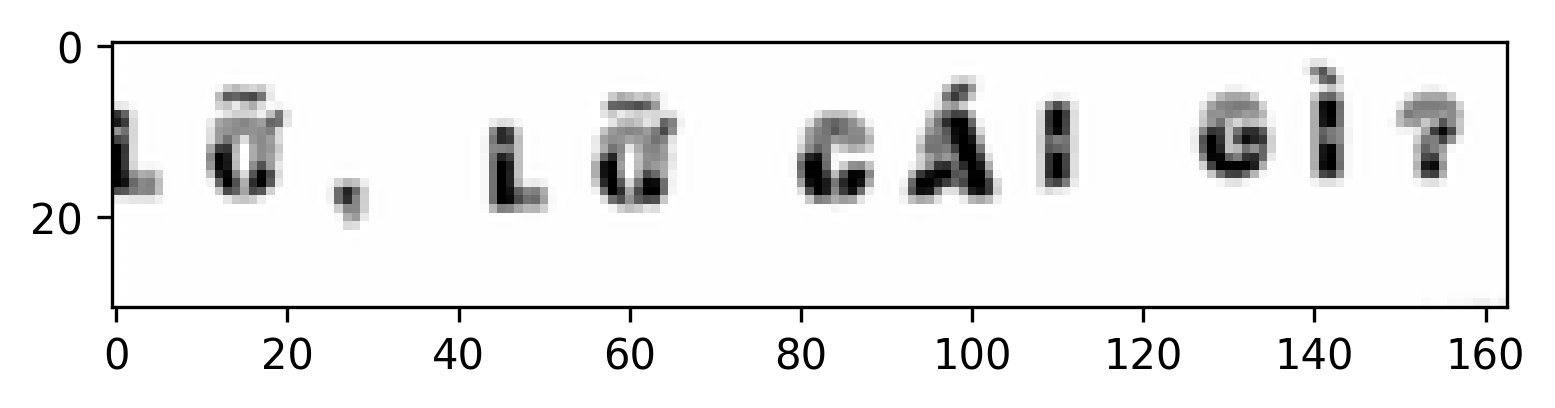

In [33]:
import random
index = random.randint(1, 10000)
img_path = os.path.join(new_image_path, new_src[index])
print(new_src[index])
print(new_tgt[index])
show_sample(img_path)